Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
epoch: 0001 cost =  2.751200352
epoch: 0002 cost =  1.134475860
epoch: 0003 cost =  0.892928687
epoch: 0004 cost =  0.775751456
epoch: 0005 cost =  0.702960036
epoch: 0006 cost =  0.652027472
epoch: 0007 cost =  0.613934140
epoch: 0008 cost =  0.583265603
epoch: 0009 cost =  0.558856153
epoch: 0010 cost =  0.537614378
epoch: 0011 cost =  0.519923362
epoch: 0012 cost =  0.504841274
epoch: 0013 cost =  0.491023529
epoch: 0014 cost =  0.479194647
epoch: 0015 cost =  0.468467124
epoch: 0016 cost =  0.457887864
epoch: 0017 cost =  0.449558418
epoch: 0018 cost =  0.441355585
epoch: 0019 cost =  0.433964354
epoch: 0020 cost =  0.426646939
epoch: 0021 cost =  0.420563552
epoch: 0022 cost =  0.414484771
epoch: 0023 cost =  0.408512525
epoch: 0024 cost =  0.403794829
epoch: 0025 cost =  0.398855721
epoch:

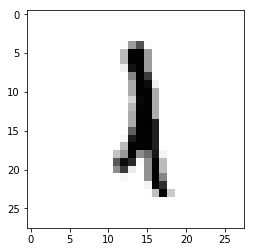

In [12]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

#MNIST data image of shape 28* 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) +b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Parameters
traning_epochs = 30
batch_size = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
   # traning cycle
    for epoch in range(traning_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
        print('epoch:', '%04d' % (epoch +1), 'cost = ', '{:.9f}'.format(avg_cost))
    print('learning finished')
    
        #test the model using test set
    print('accuracy: ', accuracy.eval(session=sess, feed_dict={X:mnist.test.images, Y: mnist.test.labels}))
    
    #Get one and predict
    r = random.randint(0, mnist.test.num_examples -1)
    print('label: ', sess.run(tf.argmax(mnist.test.labels[r:r +1], 1)))
    print('prediction: ', sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r +1]}))
    plt.imshow(
        mnist.test.images[r:r +1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest'
    )
    plt.show()